How does scaling dimensions to unit norm compare with scaling with zero-mean / unit variance?

In [22]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

In [4]:
%matplotlib inline

In [23]:
rcParams['figure.figsize'] = (10, 6)

In [27]:
N = 1000
mu = [5, 2]
cov = [[5,.3], [.3,2]] 
X = np.random.multivariate_normal(mu, cov, N)

In [30]:
# zero mean, unit variance
X_s = preprocessing.scale(X)
print np.mean(X_s, axis=0) # should be close to 0
print np.var(X_s, axis=0) # should be close to 1

[ -2.31403785e-15   3.01370040e-16]
[ 1.  1.]


In [41]:
X_u = preprocessing.normalize(X, norm='l2', axis=0)
print np.sum(X_u**2, axis=0)
print np.mean(X_u, axis=0)

[ 1.  1.]
[ 0.02893903  0.02600914]


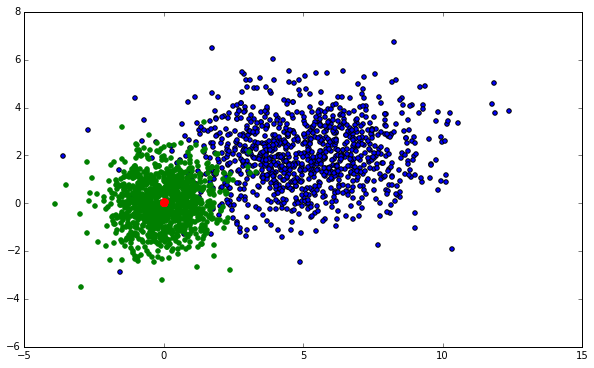

In [39]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X_s[:,0], X_s[:,1], color='green')
plt.scatter(X_u[:,0], X_u[:,1], color='red')
plt.show()

So, unit norm collapses the points very close together, but preserves shape - in which case, does that have any effect on clustering? might have something to do with stability, but most likely not. scaling, however, does change the shape such that each dimension is roughly the same. For clustering algorithms like SOM, this might end up mattering, so this is likely the way to go.